<a href="https://colab.research.google.com/github/yeooong1203/DPR-project/blob/main/%5B2024_DPR_Proj%5D_IT_%EA%B3%B5%ED%95%99%EA%B3%BC_3%ED%95%99%EB%85%84_2115290_%EA%B9%80%EB%82%98%EC%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MOTIVATION**

> 프로젝트 주제 : 유튜브 악성 댓글 탐지 프로그램

인터넷의 '익명성'을 악의적으로 이용하여 다른 사람을 험담하고 비난하는 이른바 '악플'은 과거부터 현재까지 계속해서 문제가 되어오고 있습니다.
특히 SNS, 유튜브가 사람들의 주요 소통 창구가 되며 대부분의 정보가 인터넷으로부터 공유되는 요즘에는 이러한 악성댓글이 큰 사회적 문제가 되고 있습니다.

이에 따라 악성 댓글을 감지하는 프로그램의 필요성을 느꼈고, 그중에서도 **유튜브 악성 댓글 탐지 프로그램**을 만들기로 결정하였습니다. 수많은 플랫폼들 가운데 유튜브로 선정한 이유는 유튜브는 다른 SNS 플랫폼에 비해 특정 성별이나 연령에 치우치지 않고 많은 사람들이 이용하는 서비스였으며, 매달 전세계에서 유튜브에 로그인하는 사용자는 20억명 가까이 되는 활발한 소통 창구로 이용되고 있기 때문입니다.

저는 프로젝트를 '한국어'로 쓰인 댓글을 탐지하는 프로그램으로 한정하여 제작하였으나 유튜브는 한국뿐만아니라 전세계인들이 사용하는 플랫폼인만큼 이후 외국어를 처리하는 부분을 추가한다면 전세계의 건강한 인터넷 문화에 조금이나마 도움을 줄 수 있을 것이라 기대됩니다.

# **이 프로그램에 사용된 데이터 패턴**

이 프로그램에서는 "**텍스트 데이터**", 그중에서도 비정형 데이터인 자연어를 처리하는 것을 목표로 합니다.

# **데이터 수집 과정 및 AUGMENTATION**

### <크롤링>

"유튜브 악성 댓글"을 탐지하는 프로그램인 만큼 제가 수집해야 할 데이터는 "유튜브 댓글"이었습니다. 우선 수많은 크롤링 기법 중 "셀레니움"을 활용해 직접 유튜브에 접근하여 크롤링을 하려고 시도하였으나, 유튜브에서 자동화 봇으로 인지하고 접근을 차단해 데이터를 얻어오기 쉽지 않았습니다. 또한 사이트가 업데이트 될 경우 HTML 문서 형식이 바뀌게 되어 동작하지 않을 위험성이 있어 데이터 수집 방법을 변경하게 되었습니다.

---



제가 유튜브 댓글 데이터를 수집한 방법은 **Google에서 제공하는 YouTube Data API를 이용**하는 것이었습니다.

세부적인 수집 과정은 다음과 같습니다.
1. Google Cloud에 접속하여 새로운 API 프로젝트를 생성한 후 Youtube Data API v3을 활성화 시켰습니다.
2. API 활성화 화면에서 사용자 인증 정보를 입력하면 API 키를 발급 받을 수 있습니다.

이렇게 발급받은 API 키를 이용해 Python으로 크롤링 과정을 진행하였습니다.

---



크롤링을 통해 저는 댓글과 작성자를 추출해 왔습니다.

이때 사용한 유튜브 영상은 다양한 컨텐츠를 반영해야 좋은 프로그램을 만들 수 있으므로 뷰티 / 먹방 / 유명인 / 아이돌 이렇게 4가지 유형에 해당하는 영상들을 선정하여 크롤링을 진행하였습니다.

크롤링을 통해 얻은 데이터들은 엑셀 파일에 저장해 놓았습니다.

---



### <내가 직접 생성한 데이터>

이렇게 크롤링을 통해 얻어온 데이터 뿐만 아니라

이번 프로젝트는 "내가" 생성한 데이터를 사용하는 것이 목표였으므로 저만의 데이터 또한 데이터셋에 추가하여 데이터 셋을 구성하였습니다.

제가 다루는 데이터는 텍스트 데이터 였으므로 **과거에 직접 작성했던 유튜브 댓글들을 불러와 데이터셋에 추가하고 레이블링 작업**도 하였습니다.

아래 두 개의 사진은 순서대로

(위) youtube 계정 설정에서 "내 YouTube" 댓글을 찾아본 화면과

(아래) 여기서 가져온 댓글을 엑셀 파일에 추가하고 레이블링을 완료한 화면
입니다.

비록 저는 평소에 댓글을 잘 쓰는 편이 아니라 총 11개의 데이터뿐 이었지만 제가 작성한 댓글 중에는 악성댓글이 없었으며 이에 따라 모두 일반 댓글인 0으로 레이블링 될 것이기 때문에 데이터의 균형성 차원에서 오히려 너무 많은 0 레이블을 갖는 데이터를 추가하면 성능에 좋은 영향을 미치지 않을 것 같아 적절한 수준이라고 판단하였습니다.

<center>
<img src ='https://drive.google.com/uc?id=1d7seci0pOATaAZKYlOnpmAcspRshnTNs' /></br>
</center>

<center>
<img src = 'https://drive.google.com/uc?id=1JL2Jj1HllmpstfXBlr1c2iV0pWu83Z8-' /><br>
</center>

### <레이블링>

제가 생성한 데이터가 아닌 크롤링으로 얻어온 데이터들은 유튜브 댓글과 작성자만을 포함하고 있기 때문에 지도학습을 통해 프로그램을 완성하기 위해서는 정답값인 레이블을 추가하는 레이블링 작업이 필요하였습니다.

레이블링 하는 방법을 구글링으로 많이 검색해보았으나
'작성 의도'까지 파악해 분류를 해야 하는 이 프로그램의 경우에는 **수동 레이블링** 작업이 가장 적합하다고 생각되었습니다.

엑셀 파일을 열어 Label 열을 만들고 댓글을 하나하나 읽어가며 악성댓글의 경우 1, 일반댓글의 경우 0으로 레이블링 작업을 수행했습니다.

 이 프로그램의 악성댓글 판단 기준 입니다.
1. 타인을 불쾌하게 할 수 있는 발언, 비난, 험담을 하는 댓글
2. 직접적으로 특정 대상을 상대로 욕설을 사용한 댓글
3. 직접적인 언급은 없으나 작성 의도가 다분히 악성적인 댓글
4. 여러번 반복해서 같은 내용의 댓글을 남기는 댓글 테러를 하는 경우
5. 출처없는 정확하지 않은 사실을 바탕으로 추측성 댓글을 남겨 부정적인 여론을 형성할 수 있는 댓글.
6. 해당 유튜버에게는 옹호적인 입장을 밝히고 있으나 동시에 다른 사람, 혹은 특정 집단을 거세게, 과하게 비난하며 옹호하는 댓글.

이 6가지 기준을 바탕으로 레이블링 작업을 완료하였습니다.


<center>
<img src = 'https://drive.google.com/uc?id=1u3KVizcz04sqq43vX3IPZk6Tx2dInFIF' /> <br>
</center>

레이블링 작업을 완료한 일부 화면 capture본 입니다.

---



### <데이터 증식>

아무래도 수동으로 레이블링 작업을 진행하다 보니 많은 양의 데이터를 다루기에는 시간적 한계가 있었습니다.

따라서 저는 레이블링이 완료된 총 915개의 원본 데이터를 가지고 data augmentation 기법을 활용해 데이터셋 크기의 부족함을 보완하는 방향으로 프로젝트를 진행하였습니다.

텍스트 데이터는 단어 하나만으로 문장의 의미가 완전히 바뀔 수 있기에 이미지나 영상 데이터와 달리 회전, 밝기 조절, 노이즈 삽입 등을 이용해 비교적 간단하고 안전하게 데이터를 증식할 수 없었습니다.
텍스트 데이터의 증식 기법을 찾아본 결과 유의어 대체, 역번역, 임의의 단어 삽입 / 삭제, 문장 내 임의의 두 단어 위치 바꾸기 등이 있었습니다.

특히나 이 프로그램처럼 적은 양의 데이터셋으로 딥러닝을 진행하는 경우 잘못 증식했다가 문장의 의미가 크게 바뀌어 프로그램 성능 악화에 크게 기여할 가능성이 있기에 가장 안전한 방법이 무엇일지 열심히 찾아보았습니다.

mecab을 사용하고 싶었지만 mecab은 윈도우 체제에서 지원을 안해서 여러가지 환경 변경 및 설치를 통해 시도하는 방법이 있어 따라했으나 .. 3일 내내 도전했지만 모두 실패하여 결국 사용하지 못했습니다.

대신에 저는 **파이썬 라이브러리의 nlpaug**를 사용해 **data augmentation을 진행** 하였습니다.
파이썬 라이브러리의 nlpaug 가 제공하는 Augmenter는 여러가지가 있는데, 그중에서 저는 **SynonymAug를 사용**하였습니다.

SynonymAug는 문장에서 임의의 단어를 골라 유의어로 대체하는 방식을 통해 데이터 증식을 돕는 Augmenter입니다.

SynonymAug는 유의어를 선정할 때 WordNet과 PPDB에 있는 유의어들을 기반으로 하므로 데이터의 질을 크게 떨어뜨리지 않으면서 안전한 텍스트 데이터 증식이 가능하다고 판단하여 SynonymAug를 이용해 데이터 증식을 진행하였습니다.

# **데이터셋 크기 & 딥러닝 가능성**

### 데이터셋 크기

(원본데이터) 926개 -> (증식 후) 1개

### 딥러닝 가능성.



1. 데이터 크기의 타당성
-> 이 프로그램은 텍스트 데이터셋을 사용하며 이 데이터셋은 약 930개의 유튜브 댓글로 이루어져 있습니다. 이는 이진 분류를 위한 딥러닝 모델을 훈련하기에는 다소 적은 양이지만 데이터 증식 기법을 통해 데이터를 늘릴 수 있으며 하이퍼파라미터 최적화 기법도 동원한다면 충분히 유의미한 결과를 얻을 수 있다고 판단됩니다.

2. 데이터의 대표성
-> 데이터는 실제 문제를 잘 대표해야 하므로 다양한 유형의 악성 댓글을 포함시키고자 노력했습니다. 가장 악성 댓글이 많이 달리는 뷰티/먹방/유명인/아이돌 이렇게 4가지 유형에 해당하는 영상들의 댓글을 골고루 수집하였습니다.

3. 개별 데이터의 유의미성

-> 저의 데이터셋에 있는 유튜브 댓글 하나당 단어 길이 평균을 확인해본 결과 약
56 글자로 이루어져 있었습니다. 한 댓글의 평균 길이가 길다는 것은 충분한 내용을 담고 있고 분석에 유의미한 단어 또는 어구를 담고 있을 가능성이 높으며 의미 없는 댓글일 가능성이 낮으므로

비록 데이터 전체 규모는 작더라도 제가 사용한 데이터의 quality는 나쁘지 않다고 볼 수 있었습니다.

<center>
<img src = 'https://drive.google.com/uc?id=1-uBuIRdaR3GSRhRGa30VOtFTAFG-HSU-'/><br>
</center>

# 프로그램 코드

### 필요한 패키지 및 모듈 임포트하고 설치

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

### 데이터 업로드 및 데이터 정보 확인

In [ ]:
url = 'https://raw.githubusercontent.com/yeooong1203/DPR-project/main/youtube_comment.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,Author,Comment,Label
0,@Quasar32,엠생인생 사는 서준아ㅋㅋㅋ평일 내내 그러고 다녀보니 어때 기분이 좀 나아졌어 주말에...,1
1,@user-rq3zn4rh2w,냉정하게 요목조목 두쪽다 들어봤으니 결과 를 기다리면된다 편 가르기식으로 감정적으...,0
2,@kenshiina3029,나 국민인데강대표는 국민한테 미안해할 필요없다 다만 이번 소란과 관련해 도의적인 책...,0
3,@user-vb6eb2cy8n,국민앞에 나와서 피해자 한테 머리 숙여 사죄하고 국민앞에서 벌을 받고 다시는 국민 ...,1
4,@user-oi1py5zw1u,직원들은 인간이니까말할주둥아리가있던지말던지그리고아줌마말좀 그만하세요 다나와요레오가...,1


In [ ]:
len(df)

925

## 데이터 전처리

### 결측값 제거

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Author   925 non-null    object
 1   Comment  925 non-null    object
 2   Label    925 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.8+ KB


직접 레이블링을 했기에 NULL값이 없을 가능성이 높지만

혹시 놓친 NULL 값이 있는지 info 메서드를 사용해 확인하였습니다. 925개의 행에 대해 3개의 열 모두 결측값 없이 완전함을 확인하였습니다.

### 형태소 분석 및 토큰화 + 불용어 제거

### konlpy (okt)

필요한 환경들을 설치하였습니다.

In [ ]:
!pip install Korpora

In [ ]:
!pip install konlpy

형태소 분석기 Okt를 이용하여 토큰화를 진행하였고, 이 과정에서 불용어 제거도 함께 진행하였습니다.

In [ ]:
from konlpy.tag import Okt

# 형태소 분석기 초기화
okt = Okt()

# 형태소 분석 및 불용어 제거 함수
def preprocess_text(text, stopwords):
    morphs = okt.morphs(text)
    cleaned_text = [word for word in morphs if word not in stopwords]
    return cleaned_text  # 리스트 형태로 반환

# 불용어 리스트
stopwords = ['ㄴ','ㄹ','도', '는', '다', '의', '가', '이', '은', '한', '에', '면', '어서', '지만', '으니','하',
             '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '좀', '으로', '로', '하다','합니다','입니다']

# 텍스트 전처리 함수 적용
df['Comment'] = df['Comment'].apply(lambda x: preprocess_text(x, stopwords))

# 토큰화된 결과를 리스트에 담기
comments = df['Comment'].tolist()


토큰화와 불용어 제거가 완료된 이후의 데이터 모습입니다.

In [ ]:
df.head()

,Author,Comment,Label
0,@Quasar32,"[엠생, 인생, 사는, 서준, 아, ㅋㅋㅋ, 평일, 내내, 그러고, 다녀, 보니, ...",1
1,@user-rq3zn4rh2w,"[냉정하게, 요, 목조, 목, 두, 쪽, 들어, 봤으니, 결과, 기다리면, 된다, ...",0
2,@kenshiina3029,"[나, 국민, 인데, 강, 대표, 국민, 한테, 미안해, 할, 필요없다, 다만, 이...",0
3,@user-vb6eb2cy8n,"[국민, 앞, 나와서, 피해자, 한테, 머리, 숙여, 사죄, 하고, 국민, 앞, 에...",1
4,@user-oi1py5zw1u,"[직원, 인간, 이니까, 말, 할, 주둥아리, 있던지말던지, 그리고, 아줌마, 말좀...",1


이후 Embedding 모델을 사용하여 학습 시킬 때 Embedding 층의 input 차원을 몇으로 할 건지 정하려면 토큰화하여 얻은 단어 사전의 단어 개수를 알아야 하므로 이 코드를 통해 vocab_size를 구했습니다.

In [ ]:
# 전처리된 텍스트 데이터에서 모든 단어 모으기
all_words = [word for sublist in comments for word in sublist]

# 중복 제거하여 고유한 단어만 남기기
unique_words = set(all_words)

# 어휘 크기 계산
vocab_size = len(unique_words)
print("어휘 크기:", vocab_size)

어휘 크기: 5940


### 훈련셋 데이터셋 분리

In [ ]:
from sklearn.model_selection import train_test_split
comments = df["Comment"]
labels = df["Label"]

X_train, X_test, y_train, y_test = train_test_split(comments, labels, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# 결과 확인
print("훈련셋 크기:", X_train.shape, y_train.shape)
print("검증셋 크기:", X_val.shape, y_val.shape)
print("테스트셋 크기:", X_test.shape, y_test.shape)


훈련셋 크기: (748,) (748,)
검증셋 크기: (84,) (84,)
테스트셋 크기: (93,) (93,)


### 데이터 augmentation

nlpaug를 사용하기 위해 필요한 환경을 설치해줍니다.

In [ ]:
!pip install nlpaug pandas


ContextualWordEmbsAug를 사용해 데이터 증식을 진행합니다.

In [ ]:
import nlpaug.augmenter.word as naw

# WordNet을 사용한 증식
augmenter = naw.SynonymAug(aug_src='wordnet', aug_max=2)

# 텍스트 데이터에 대해 데이터 증식 수행
augmented_texts = []
for text in X_train:
    augmented_text = augmenter.augment(text)
    augmented_texts.append(augmented_text)

print(augmented_texts)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[['예', '몽', '님', '영상', '자주', '올려주세요', '너무', '행복해요', '완전', '팬', '이에요'], ['피부', '붉게', '올라오신거', '혹시', '피부', '나', '몸', '이상', '있으', '신건', '아닌지', '걱정', '되네요', '피부', '과를', '가보', '심', '어떨까', '요'], ['개통', '령', 'ixl', '전', '볼줄도', '모르고', '볼', '시간', '없어요', 'thirty nine', '같은', '새', '빨', '보이는', '말', '처', '하고', '걸', '그대로', '믿는', '개통', '령빠', '문제', 'ㅋ', '2022년', '기사', '보면', '강형욱', '이런', '상황', '발견', '할', '경우', '엔', '누가', '치우지', '않았는지', '돌려', '본다며', '엘리베이터', '에서', '반려견', '오줌', '쌌는데', '그냥', '가는', '분도', '있다', '그', '보호자', '색출', '해서', '민망하게', '만드는', '짓은', '안', '하지만', '누가', '그랬는지는', '알', '있다', '했던데', '보지', '않고', '보는', '법도', '모른다', '시전', '제', 'ternion', '자인', '고객', '나온', '녹화', '본을', '고객', '동', '의도', '없이', '경찰', '입회', '없이', '사장', '마음대로', '보는것도', '위법', '여지', '큰데', 'ㅋ', '자기', '보고싶을', '때', '돌려', '보누', 'ㅋㅋ'], ['나도', '치킨', '먹을', '생각', '만', '하면', '텐션', '오르고', '설렘', '넘치는', '사람', '으로써', '저', '행복감', '알', '대리', '만족', '하구', '갑니다'], ['구두', '영상', '찾아보다가', '우연히', '보게', '되었는데', '말씀', '논리', '정연', '너무', '잘', '하시고', '일단', '멘탈',

In [ ]:
import numpy as np

# 리스트를 NumPy 배열로 변환
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

# 증식된 데이터도 NumPy 배열로 변환
augmented_texts_np = np.array(augmented_texts, dtype=object)

# 합친 데이터를 다시 리스트로 변환
X_train_combined = list(X_train_np) + list(augmented_texts_np)
y_train_combined = list(y_train_np) + list(y_train_np)  # 레이블도 증식된 만큼 추가합니다.

print("Combined X_train:", X_train_combined)
print("Combined y_train:", y_train_combined)


Combined X_train: [['예', '몽', '님', '영상', '자주', '올려주세요', '너무', '행복해요', '완전', '팬', '이에요'], ['피부', '붉게', '올라오신거', '혹시', '피부', '나', '몸', '이상', '있으', '신건', '아닌지', '걱정', '되네요', '피부', '과를', '가보', '심', '어떨까', '요'], ['개통', '령', '39', '전', '볼줄도', '모르고', '볼', '시간', '없어요', '39', '같은', '새', '빨', '보이는', '말', '처', '하고', '걸', '그대로', '믿는', '개통', '령빠', '문제', 'ㅋ', '2022년', '기사', '보면', '강형욱', '이런', '상황', '발견', '할', '경우', '엔', '누가', '치우지', '않았는지', '돌려', '본다며', '엘리베이터', '에서', '반려견', '오줌', '쌌는데', '그냥', '가는', '분도', '있다', '그', '보호자', '색출', '해서', '민망하게', '만드는', '짓은', '안', '하지만', '누가', '그랬는지는', '알', '있다', '했던데', '보지', '않고', '보는', '법도', '모른다', '시전', '제', '3', '자인', '고객', '나온', '녹화', '본을', '고객', '동', '의도', '없이', '경찰', '입회', '없이', '사장', '마음대로', '보는것도', '위법', '여지', '큰데', 'ㅋ', '자기', '보고싶을', '때', '돌려', '보누', 'ㅋㅋ'], ['나도', '치킨', '먹을', '생각', '만', '하면', '텐션', '오르고', '설렘', '넘치는', '사람', '으로써', '저', '행복감', '알', '대리', '만족', '하구', '갑니다'], ['구두', '영상', '찾아보다가', '우연히', '보게', '되었는데', '말씀', '논리', '정연', '너무', '잘', '하시고', '일단', '멘탈

데이터를 증식시켰으므로 원본 데이터와 증식된 데이터를 합치고

얼마나 증식되었는지 출력하여 확인합니다

### 정수인코딩, 패딩

일반화 성능을 어느정도 유지시키기 위해 훈련셋, 테스트셋, 검증셋 분리 후 정수 인코딩과 패딩을 진행하였습니다.

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

# 정수 인코딩 수행
X_train_sequences = tokenizer.texts_to_sequences(X_train_combined)
X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# 패딩 수행
max_length = 100  # 최대 시퀀스 길이 설정
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')


## 모델 선택 및 학습

### 하이퍼 파라미터 튜닝

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.2 MB/s eta 0:00:00


In [ ]:
# Embedding 층의 입력으로 들어갈 수 있도록 NumPy 배열로 변환
X_train_np = np.array(X_train_padded)
X_test_np = np.array(X_test_padded)
X_val_np = np.array(X_val_padded)
y_train_np = np.array(y_train_combined)
y_val_np = np.array(y_val)

In [ ]:
import optuna
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

def create_model(trial):
    # Optuna를 사용하여 Embedding 크기와 LSTM 유닛 수를 조정
    embedding_dim = trial.suggest_int('embedding_dim', 50, 200)
    lstm_units = trial.suggest_int('lstm_units', 32, 128)

    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=100))
    model.add(LSTM(lstm_units))
    model.add(Dense(1, activation='sigmoid'))

    # Adam optimizer 사용
    optimizer = Adam(learning_rate=0.001)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def objective(trial):
    model = create_model(trial)
    history = model.fit(X_train_np, y_train_np, validation_data=(X_val_np, y_val_np), epochs=20, batch_size=8, verbose=0)
    return history.history['val_accuracy'][-1]  # 검증 정확도를 최적화 지표로 사용

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print('Best trial:')
trial = study.best_trial
print(f'  Value: {trial.value}')
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')


[I 2024-06-02 12:39:16,351] A new study created in memory with name: no-name-caf2835f-73f6-411d-b0f1-56a6a202d660
[I 2024-06-02 12:42:43,151] Trial 0 finished with value: 0.6190476417541504 and parameters: {'embedding_dim': 193, 'lstm_units': 33}. Best is trial 0 with value: 0.6190476417541504.
[I 2024-06-02 12:48:09,461] Trial 1 finished with value: 0.6190476417541504 and parameters: {'embedding_dim': 178, 'lstm_units': 92}. Best is trial 0 with value: 0.6190476417541504.
[I 2024-06-02 12:51:53,593] Trial 2 finished with value: 0.6190476417541504 and parameters: {'embedding_dim': 107, 'lstm_units': 100}. Best is trial 0 with value: 0.6190476417541504.
[I 2024-06-02 12:55:19,483] Trial 3 finished with value: 0.6190476417541504 and parameters: {'embedding_dim': 76, 'lstm_units': 89}. Best is trial 0 with value: 0.6190476417541504.
[I 2024-06-02 12:58:44,655] Trial 4 finished with value: 0.6190476417541504 and parameters: {'embedding_dim': 167, 'lstm_units': 53}. Best is trial 0 with val

# **<딥러닝 설명>**

## <사용된 함수>

우선 최적의 하이퍼파라미터 조합으로 모델을 구성하기 위해 하이퍼파라미터 최적화를 위한 오픈소스 프레임워크인 Optuna를 사용하였습니다.

create_model 함수:

이 함수는 Optuna가 제안한 하이퍼파라미터에 따라 모델을 만듭니다. 임베딩 층, LSTM 층 및 출력 층을 포함하는 Sequential 모델을 만듭니다. 이 모델은 임베딩 크기와 LSTM 유닛 수를 하이퍼파라미터로 받습니다.

optuna.create_study 함수:

Optuna의 Study 객체를 생성하는 함수입니다. Study는 하이퍼파라미터 튜닝을 위한 최적화 과정을 담당합니다. 이 때 direction='maximize'를 사용하여 최대화를 목표로 하는 최적화를 수행합니다.

objective 함수:

이 함수는 주어진 하이퍼파라미터를 사용하여 모델을 훈련하고 검증 세트의 정확도를 반환합니다. 이 정확도가 최적화의 지표로 사용됩니다

study.optimize 함수:

이 함수는 objective 함수를 최적화하고 최적의 하이퍼파라미터를 찾습니다. 여기서는 최대 20회 시도를 설정하였습니다.



최적의 결과는 study.best_trial을 통해 얻을 수 있습니다. 여기서는 검증 정확도가 최대화되도록 최적의 하이퍼파라미터를 찾았습니다.

## <딥 네트워크 구조>

Embedding 층:

이 층에서는 텍스트 데이터의 특성을 고차원의 벡터 공간으로 변환하는 역할을 합니다. vocab_size와 embedding_dim을 인자로 사용하여 Embedding 층을 구성했습니다.


---


LSTM 층:

이 층은 시퀀스 데이터의 장기 의존성을 학습하는 데 사용됩니다. 이 모델에서는 lstm_units를 인자로 사용하여 LSTM 층을 구성했습니다


---


출력 층:

이 모델은 이진 분류 문제를 다루기 때문에 출력 층에는 하나의 뉴런이 있습니다.
이 모델에서는 시그모이드 활성화 함수를 사용하여 출력 층의 결과를 0과 1 사이의 확률로 변환하였습니다.

이러한 구조의 모델을 통해 텍스트 데이터를 임베딩하여 의미 있는 특성을 추출하고, LSTM 층을 통해 시퀀스 정보를 처리한 후, 출력 층을 통해 이진 분류를 수행하도록 하였습니다.

### 최적의 하이퍼파라미터 조합으로 모델 생성

In [ ]:
# 최적의 하이퍼파라미터로 모델 생성
best_embedding_dim = study.best_params['embedding_dim']
best_lstm_units = study.best_params['lstm_units']
best_model = Sequential()
best_model.add(Embedding(vocab_size, best_embedding_dim, input_length=100))
best_model.add(LSTM(best_lstm_units))
best_model.add(Dense(1, activation='sigmoid'))

# Adam optimizer 사용
optimizer = Adam(learning_rate=0.001)
best_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

## 성능 측정 및 평가

In [ ]:
# 테스트 세트에서 모델 평가
test_loss, test_accuracy = best_model.evaluate(X_test_padded, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


6/6 [==============================] - 1s 38ms/step - loss: 0.6820 - accuracy: 0.6776
Test Loss: 0.6819636821746826, Test Accuracy: 0.6775956153869629


모델의 일반화 성능을 판단할 수 있도록 test 세트를 이용하여 모델을 평가하였습니다.

테스트 손실 - 이 모델의 테스트 손실은 약 0.682입니다.

테스트 정확도 - 이 모델의 테스트 정확도는 약 67.76%로 나타났습니다. 이는 테스트 세트의 전체 샘플 중 약 67.76%가 모델에 의해 올바르게 분류되었다는 것을 의미합니다.

테스트 결과를 종합하면, 이 모델은 테스트 세트에서 약 67.76%의 정확도로 샘플을 분류하는 것으로 나타났습니다.





학습 곡선을 그려 모델의 성능 평가 결과를 시각화 해보았습니다.

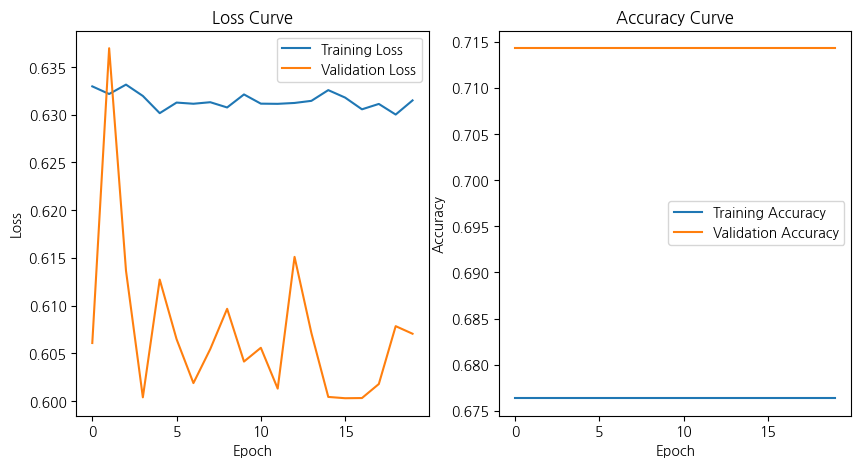

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curve(history):
    # 훈련 및 검증 손실 추출
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # 훈련 및 검증 정확도 추출
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # 손실 그래프
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.legend()

    # 정확도 그래프
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.show()

# 모델 훈련
history = best_model.fit(X_train_np, y_train_np, validation_data=(X_val_np, y_val_np), epochs=20, batch_size=8, verbose=0)

# 학습 곡선 그리기
plot_learning_curve(history)


학습 곡선의 첫 번째 요소는 훈련 손실과 검증 손실의 변화입니다. 훈련 손실은 모델이 훈련 데이터에 대해 얼마나 잘 적합되는지를 나타내며, 검증 손실은 모델이 검증 데이터에 대해 얼마나 일반화되는지를 나타냅니다.

이 학습 곡선에는 훈련 정확도와 검증 정확도의 변화도 포함됩니다. 이는 모델이 훈련 데이터와 검증 데이터에 대해 얼마나 정확하게 분류하는지를 보여줍니다.

# **PROGRESS REPORT**

1. "유튜브 악성댓글 탐지기"로 주제 선정 (5/16)

2. 데이터 수집 (5/18 ~ 5/25)

  Google 의 Youtube data API 활용해 크롤링

  댓글과 작성자 추출

  한글, 숫자만 골라 추출.(정규표현식)

  다양한 유형의 영상 활용하여 일반화 도모

  일반댓글 0, 악성댓글 1로 라벨링
  
3. 데이터 전처리(5/26~29)
  결측데이터 삭제
  토큰화 with 형태소 분석 -> 이 과정에서 불용어도 제거 가능

  훈련셋과 테스트셋으로 분리

  훈련셋은 또 검증셋과 훈련셋으로 분리

  정수 인코딩 & 패딩(길이 통일)

4. 데이터 보완 (5/29~30)
  데이터 증식 - RD/RS
  전이학습? (Transformer / BERT)
  -> 나같이 데이터가 적은 경우 전이학습, 그중에서도 자연어 처리에 매우 유용한 Google사의 BERT 를 사용할까 고민했으나 BERT를 사용하면 내가 직접 딥러닝 한 모델을 사용하여 진행하는 프로젝트라고 할 수 없을 것 같아 포기..

5. 모델 선택(5/31)
    LSTM

6. 모델 하이퍼파라미터 미세 튜닝(5/31)
    Optuna

7. 모델 훈련 및 성능 평가(5/31)

# **참고자료 및 링크 첨부**

https://arxiv.org/pdf/1901.11196 - EDA  (공부용)

https://nlpaug.readthedocs.io/en/latest/augmenter/word/context_word_embs.html - nlpaug

https://bo-10000.tistory.com/202 - optuna 사용법

https://blog.naver.com/j7youngh/222875104191 - 한국어 토큰화의 여러 방법

https://www.youtube.com/watch?v=r87VZ6YGHM8


강의록 4주차 2번째 & 5주차 2번째

#**느낀점**


이제껏 저는 머신러닝과 딥러닝을 배워오면서 항상 주어진 데이터들을 가지고만 코드를 돌려보았었습니다. 그러나 이번 DPR 텀프로젝트를 계기로 '내가 직접' 데이터를 수집하고, 레이블링하고, 전처리 하는 과정을 거치며 하나부터 열까지 스스로의 힘으로 하나의 프로그램을 만드는 경험을 해보니 생각보다 쉽지 않고 엄청난 인내심과 끈기와 성실함이 필요하다는 것을 깨달을 수 있었습니다. 특히나 데이터 수집, 전처리의 중요성과 그 복잡함을 몸소 느낄 수 있었고, 데이터 증식과 모델 미세 튜닝 작업을 통해 바뀌어가는 학습곡선을 확인하면서 뭔지 모를 뿌듯함과 보람 또한 느꼈습니다. 저는 자연어 처리에 이전부터 관심이 있어 이번 프로젝트를 자연어 텍스트 처리 프로그램을 주제로 잡았는데 진행하면서 자연어 처리에 이렇게나 고려할 게 많고, 까다롭고, 그래서 이를 위해 만들어진 모델들과 패키지가 엄청 다양하며, 그 많은 것들 중에 자신의 목적과 용도에 맞게 적절히 사용할 줄 아는 능력이 중요하다는 것도 알게 되었습니다. 비록 고생도 많이 했지만 이번 프로젝트를 계기로 여러 방면에서 성장한 것 같아 의미있고 소중한 시간이었습니다. 감사합니다.